## Titanic

목차:

**[I. 데이터 불러오기 및 확인](#one)**

- [a. 데이터 불러오기 및 결측치 확인](#one-a)

**[II. EDA & FE](#two)**

- [a. Pclass](#two-a)
- [b. Sex](#two-b)
- [c. SibSp](#two-c)
- [d. Parch](#two-d)
- [e. Name](#two-e)
- [f. Age](#two-f)
- [g. Embarked](#two-g)
- [h. Fare](#two-h)
- [i. cabin](#two-i)

    
**[III. 모델링](#three)**

- [a. 로지스틱 회귀](#three-a)
- [b. kfold](#three-b)
- [c. 파라미터 튜닝 & GridSearchCV](#three-c)

**[IV. 예측](#four)**

- [a. 앙상블](#four-a)
- [b. voting](#four-b)
- [c. stacking](#four-c)

## I. 데이터 불러오기 및 확인 <a id="one"></a>

1. 변수 | 설명
------- | -------
**PassengerId** | id
**Survived** | 생존 여부 (0 = 사망, 1 = 생존) 
**Pclass** | 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
**name** | 이름  
**Sex** | 성별
**Age** | 나이
**SibSp** | 함께 탑승한 자녀 , 배우자 의 수
**Parch** | 함께 탑승한 부모님 , 아이들 의 수
**Fare** | 요금
**Ticket** | 티켓 번호
**Cabin** | 수하물 번호
**Embarked** | 선착장 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'

### a. 데이터 불러오기 및 결측치 확인 <a id="one-a"></a>

In [3]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
sample_submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

> 결측치 확인 결과 AGE와 Cabin, Embarked 피처에 대해 처리를 해줘야 될거 같다

## II. EDA & FE <a id="two"></a> 

train 데이터셋에는 11개의 col(survived), test 데이터셋에는 10개의 col이 있어서 test col을 기준으로 합치는 듯

In [85]:
fe_name = list(test)
df_train = train[fe_name]
df = pd.concat((df_train,test))
#print(fe_name)

print(df)
df1= pd.concat((train,test))
df1

     PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
413         1305       3                                 Spector, Mr. Woolf   
414         1306       1                       Oliva y Ocana, Dona. Fermina   
415         1307       3                       Saether, Mr. Simon Sivertsen   
416         1308       3                                Ware, Mr. Frederick   
417         1309       3                           Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


In [11]:
print(train.shape, test.shape, df.shape)

(891, 12) (418, 11) (1309, 11)


In [12]:
target = train['Survived']

In [105]:
def stack_plot(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar', stacked= True, figsize = (10,5))
    
#stack_plot 그려주기. 생존 수를 pclass 기준으로 나눔.
#survived = train[train['Survived'] == 1]['Pclass'].value_counts()
#survived
#dead = train[train['Survived'] == 0]['Pclass'].value_counts()
#print(dead)
#df = pd.DataFrame([survived,dead])
#df

([<matplotlib.patches.Wedge at 0x7fc3b41c2fd0>,
 [Text(-0.39257493509945834, 1.0275626113924428, 'survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'dead')],
 [Text(-0.2141317827815227, 0.5604886971231505, '62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38%')])

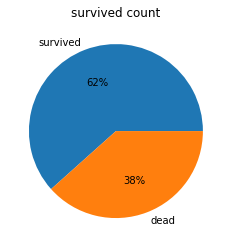

In [88]:
lable = ['survived','dead']
plt.title('survived count')
plt.pie(train['Survived'].value_counts(),labels= lable,autopct='%.f%%')
#explode = explode,## Apple과 Banana를 튀어나오게한다.
#labels=labels, ## 라벨 출력
#startangle=90, ## 시작점을 90도(degree)로 지정
#counterclock=False, ## 시계 방향으로 그린다.
#autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력

>전체 62%가 사망한것을 볼 수 있다.

### a.Pclass <a id="two-a"></a>

In [109]:
def stack_plot(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar', stacked= True, figsize = (10,5))
    
#stack_plot 그려주기. 생존 수를 pclass 기준으로 나눔.
#survived = train[train['Survived'] == 1]['Pclass'].value_counts()
#survived
#dead = train[train['Survived'] == 0]['Pclass'].value_counts()
#print(dead)
#df = pd.DataFrame([survived,dead])
df

,1,2,3
Pclass,136,87,119
Pclass,80,97,372


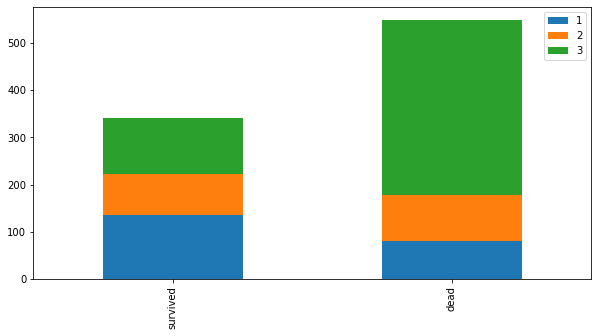

In [107]:
stack_plot('Pclass')

In [108]:
Pclass_encoded = pd.get_dummies(df['Pclass'],prefix= 'Pclass')
df = pd.concat((df,Pclass_encoded), axis=1)
df = df.drop(columns = 'Pclass')

KeyError: 'Pclass'

>3등석 사람이 많이 죽은 것을 볼 수 있으며 Pclass 피처는 카테코리 변수로 판단하여 원핫 인코딩을 위해 더미변수로 만듭니다.

### b.Sex <a id="two-b"></a>

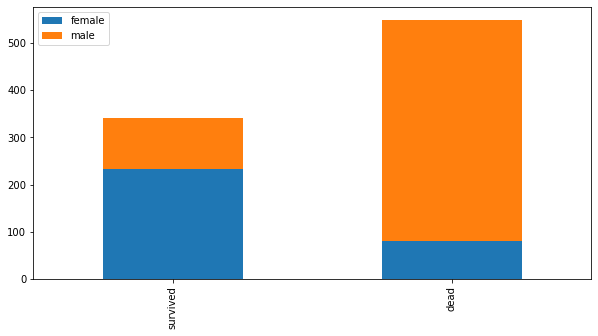

In [17]:
stack_plot('Sex')

In [18]:
sex_encoded = pd.get_dummies(df['Sex'],prefix= 'Sex')
df = pd.concat((df,sex_encoded), axis=1)
df = df.drop(columns = 'Sex')

In [19]:
df.drop('Sex_female', axis=1, inplace=True)

>Sex 피처는 카테코리 변수로 판단하여 원핫 인코딩을 위해 더미변수로 만듭니다.

### c.SibSp <a id="two-c"></a>

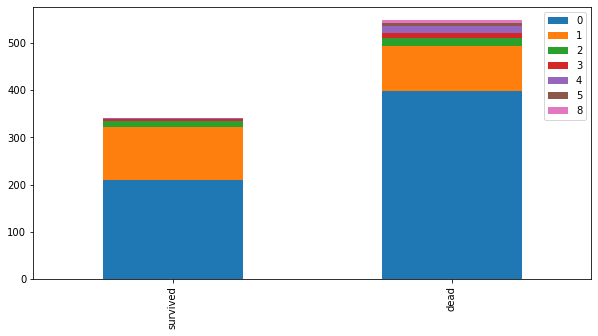

In [20]:
stack_plot('SibSp')

### d.Parch <a id="two-d"></a>

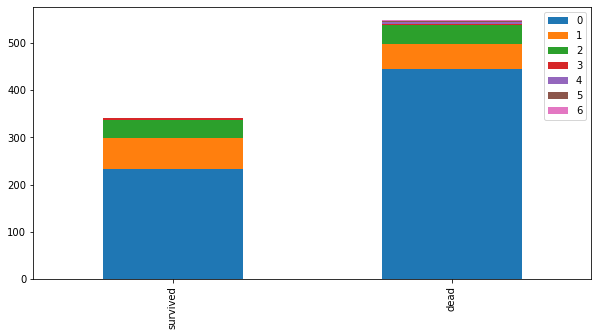

In [21]:
stack_plot('Parch')

In [22]:
df['Travelpeople']=df["SibSp"]+df["Parch"]
df['TravelAlone']=np.where(df['Travelpeople']>0, 0, 1)

In [23]:
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)

In [24]:
df.drop('Travelpeople', axis=1, inplace=True)

>SibSp와 Parch 변수들은 같이 여행을 온 경우로 판단하여
다중 공선성을 고려하여 하나로 합친 다음에 여행을 혼자 왔는지 아닌지로 파생변수를 만듭니다.

### e.Name <a id="two-e"></a>

>Mr - 남자
Mrs. 결혼한 기혼 여자
Miss. 결혼하지 않은 미혼 여자
Ms. 여자일경우

In [25]:
df['New_name']  = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train['New_name']  = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [26]:
train ['New_name'] =  train['New_name'].map({"Mr": 0 , "Mrs":2, "Miss":1,"Dr":3,"Rev":3,
                                             "Mlle":3,"Major":3,"Col":3,"Ms":3,"Jonkheer":3,
                                             "Sir" :3,"Lady":3,"Mme":3,"Capt":3,"Don":3,"Countess":3})
df['New_name'] =  df['New_name'].map({"Mr": 0 , "Mrs":2, "Miss":1,"Dr":3,"Rev":3,
                                             "Mlle":3,"Major":3,"Col":3,"Ms":3,"Jonkheer":3,
                                             "Sir" :3,"Lady":3,"Mme":3,"Capt":3,"Don":3,"Countess":3})

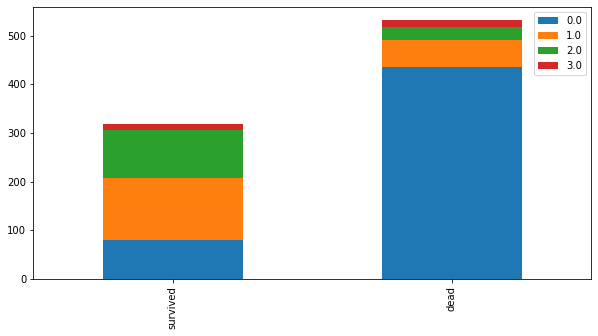

In [27]:
stack_plot('New_name')

In [28]:
df['New_name'] = df['New_name'].fillna('0')

In [29]:
df = df.astype({'New_name':'float'})

In [30]:
df = df.drop(columns = 'Name')

In [31]:
New_name_encoded = pd.get_dummies(df['New_name'],prefix= 'New_name')
df = pd.concat((df,New_name_encoded), axis=1)
df = df.drop(columns = 'New_name')

> 이름의 경우 정규 표현식을 이용해서 Name 피처를 처리해주고 남자 여자 그외로 매핑해준다.
Mr - 남자 / Mrs. 결혼한 기혼 여자 / Miss. 결혼하지 않은 미혼 여자 / MS. 여자일 경우
그래프를 보면 남자가 많이 사망한것으로 보며 결측치를 남자로 채웠고 더미변수를 만들어 주었다.

### f.Age <a id="two-f"></a>

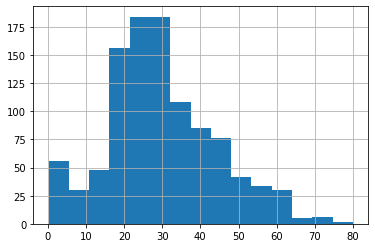

In [32]:
df['Age'].hist(bins = 15)

In [33]:
df['Age'].fillna(28, inplace = True)

>Age 피처의 데이터 확인결과 우측으로 기울어져있기 때문에 평균값을 사용하는 것보다 중앙값을 사용하기로 했다

### g.Embarked <a id="two-g"></a>

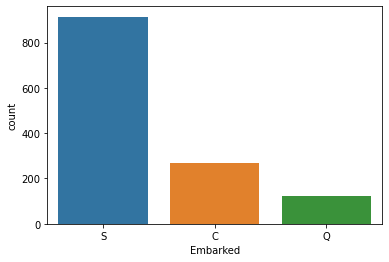

In [34]:
sns.countplot(x= 'Embarked', data= df)

In [35]:
df['Embarked'].fillna('S',inplace=True)

In [36]:
Embarked_encoded = pd.get_dummies(df['Embarked'],prefix= 'Embarked')
df = pd.concat((df,Embarked_encoded), axis=1)
df = df.drop(columns = 'Embarked')

>Embarked 피처는 countplot 결과 S선착장이 많은 것을 볼 수 잇으며 결측치를 S로 대체하였고
카테코리 변수로 판단하여 원핫 인코딩을 위해 더미변수로 만듭니다.

### h.Fare <a id="two-h"></a>

In [37]:
from scipy.stats import norm

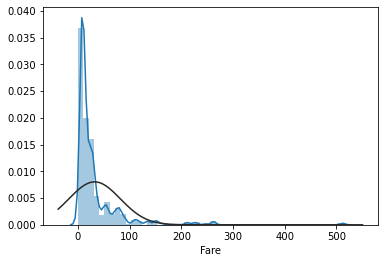

In [38]:
sns.distplot(train['Fare'],fit = norm)

>정규규분포가 아닌 매우 비대칭 분포 멱변환을 통해서 정규화를 시켜준다

In [39]:
df['Fare'] = df['Fare'].map(lambda i : np.log(i) if i >0 else 0)

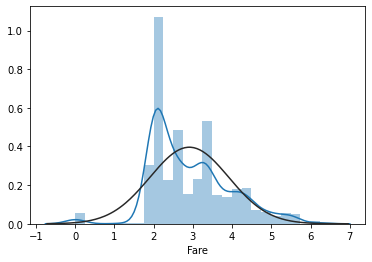

In [40]:
sns.distplot(df['Fare'],fit = norm)

>정규규분포가 아닌 매우 비대칭 분포 멱변환을 통해서 정규화를 시켜준다

### i.Cabin <a id="two-i"></a>

In [41]:
df['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
B96 B98            4
D                  4
                  ..
F38                1
A26                1
F E69              1
E49                1
A10                1
Name: Cabin, Length: 186, dtype: int64

In [42]:
df = df.drop(columns = 'Cabin')

>변수에 결측값이 너무 많아. 이 값은 승객의 클래스 및 지불 된 운임과 관련이있는 것으로 보고 드롭했습니다

In [43]:
df = df.drop(['PassengerId','Ticket'],axis = 1)

> PassengerId , Ticket 피처들도 모델링 과정에 필요없는 변수들이므로 드롭해줍니다

In [44]:
df.isnull().sum()

Age             0
Fare            0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Sex_male        0
TravelAlone     0
New_name_0.0    0
New_name_1.0    0
New_name_2.0    0
New_name_3.0    0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

## III. 모델링 <a id="three"></a>

In [45]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### a. 로지스틱 회귀 <a id="three-a"></a>

In [46]:
new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

In [47]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S",
      "Sex_male",'New_name_0.0','New_name_1.0', 'New_name_2.0'] 

In [48]:
X = new_train[cols]
Y = train['Survived']

In [49]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.445151
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                           10
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.3315
Time:                        07:09:55   Log-Likelihood:                -396.63
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.393e-78
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0386      0.008     -4.734      0.000      -0.055      -0.023
Fare             0.1720

> 로지스틱 모델 확인 결과 Fare, Embarked_S,Embarked_C,New_name_0 피처에 대해서 p-value가 0.05 기준으로 높게 나와있으므로 해당 피처를 모두 제고하고 다시 확인해 봅니다.

In [50]:
cols2 = ["Age", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_S",
      "Sex_male",'New_name_1.0', 'New_name_2.0'] 

In [51]:
X2=new_train[cols2]
Y=train['Survived']

logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.446233
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.3299
Time:                        07:09:55   Log-Likelihood:                -397.59
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.611e-80
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0384      0.008     -4.773      0.000      -0.054      -0.023
TravelAlone      0.2767

> 로지스틱 모델 확인 결과 TravelAlone 피처에 대해서 p-value가 0.05 기준으로 높게 나와있으므로 피처를 모두 제고하고 다시 확인해 봅니다.

In [52]:
cols3=["Age", "Pclass_1", "Pclass_2","Embarked_S",
      "Sex_male",'New_name_1.0', 'New_name_2.0'] 

In [53]:
X3=new_train[cols3]
Y=train['Survived']

logit_model=sm.Logit(Y,X3)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447313
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.3283
Time:                        07:09:55   Log-Likelihood:                -398.56
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.944e-81
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Age             -0.0349      0.008     -4.617      0.000      -0.050      -0.020
Pclass_1         2.3477

> 모든 피처들이 유의수준 0.05보다 낮은것을 확인 할 수 있습니다.

In [54]:
f_test = new_test[cols3]

In [55]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X3, Y)

print("모델 Accuracy : {:.2f}%".format(logreg.score(X3, Y)*100))

모델 Accuracy : 80.36%


> 모델의 Accuracy를 높이기 위해서 로지스틱 회귀를 사용할 수 있겠지만 모델의 성능을 높이기 위해서
여러 모델을 활용하여 앙상블을 합니다

### b. kfold <a id="three-b"></a>

In [56]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [57]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [58]:
kfold = StratifiedKFold(n_splits=8)

In [59]:
random_state = 1
clf = []

clf.append(XGBClassifier(random_state = random_state))
clf.append(LGBMClassifier(random_state = random_state))
clf.append(KNeighborsClassifier())
clf.append(RandomForestClassifier(random_state=random_state))
clf.append(GradientBoostingClassifier(random_state=random_state))
clf.append(DecisionTreeClassifier(random_state=random_state))
clf.append(LogisticRegression(random_state = random_state))
clf.append(SVC(random_state=random_state))

In [60]:
clf_results = []
for classifier in clf :
    clf_results.append(cross_val_score(classifier, new_train, y = Y, scoring = "accuracy", cv = kfold, n_jobs=4))

In [61]:
clf_means = []
clf_std = []
for clf_result in clf_results:
    clf_means.append(clf_result.mean())
    clf_std.append(clf_result.std())

In [62]:
clf_re = pd.DataFrame({"CrossValMeans":clf_means,"CrossValerrors": clf_std})
clf_re

,CrossValMeans,CrossValerrors
0,0.817125,0.029381
1,0.821579,0.033308
2,0.799178,0.027438
3,0.804768,0.031681
4,0.826104,0.034472
5,0.783482,0.036045
6,0.796865,0.034066
7,0.698108,0.025867


> 데이터 세트를 8개의 그룹으로 분할한 다음에 8개의 모델에 대해서 기본 모델을 구축한 뒤 gridsearchcv를 통해서 변수들을 최적화 시켜줍니다. kfold 확인 결과 4개의 모델을 이용해서 앙상블 하려고 합니다 

### c. 파라미터 튜닝 & GridSearchCV <a id="three-c"></a>

In [63]:
# XGBoost 파라미터 튜닝 
XGB = XGBClassifier()
xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}
gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsXGB.fit(new_train,Y)
XGB_best = gsXGB.best_estimator_

# 최고 점수
gsXGB.best_score_

Fitting 8 folds for each of 100 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done 336 tasks      | elapsed:   30.2s
[Parallel(n_jobs=4)]: Done 586 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:  1.6min finished


0.8339868886743886

In [64]:
#LGBMClassifier 파라미터 튜닝
LGB = LGBMClassifier()
lgb_param_grid = {
    'n_estimators': [400, 700, 1000], 
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}
gsLGB = GridSearchCV(LGB,param_grid = lgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsLGB.fit(new_train,Y)
LGB_best = gsLGB.best_estimator_

# 최고 점수
gsLGB.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 432 out of 432 | elapsed:   10.5s finished


0.8250281531531531

In [65]:
# RandomForestClassifier 파라미터 튜닝 
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(new_train,Y)
RFC_best = gsRFC.best_estimator_

# 최고 점수
gsRFC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   23.2s
[Parallel(n_jobs=4)]: Done 432 out of 432 | elapsed:   55.4s finished


0.8317446911196912

>Extra Tree Classifier와 유사하게 Random Forest는 여러 의사 결정 트리 분류자를 데이터 집합의 다양한 하위 샘플에 맞추고 평균을 사용하여 예측 정확도를 개선하고 과적 합을 제어합니다. 하위 샘플 크기는 항상 원래 입력 샘플 크기와 동일하지만 bootstrap = True (기본값) 인 경우 샘플이 대체로 그려집니다.

>ET와 RF의 차이점-
>1) 분할에서 변수를 선택할 때, 훈련 세트의 부트 스트랩 샘플 대신 전체 훈련 세트에서 샘플이 추출됩니다.
>2) 분할은 각 분할에서 샘플의 값 범위에서 무작위로 완전히 선택됩니다.

In [66]:
# Gradient boosting 파라미터 튜닝
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(new_train,Y)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 72 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   18.2s
[Parallel(n_jobs=4)]: Done 576 out of 576 | elapsed:   27.8s finished


0.8238215894465895

> 그라디언트 부스팅은 예측 모델을 작성하는 가장 강력한 기술 중 하나로 부스팅은 단계별 모델 방식으로 가산 모델을 작성하여 약한 학습자를 강력한 학습자로 변환하는 방법 
부스팅에서 각각의 새 트리는 원래 데이터 세트의 수정 된 버전에 적합하다.

## IV. 예측 <a id="four"></a>

### a.앙상블 <a id="four-a"></a>

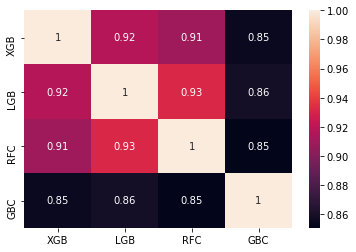

In [67]:
test_Survived_XGB = pd.Series(XGB_best.predict(new_test), name="XGB")
test_Survived_LGB = pd.Series(LGB_best.predict(new_test), name="LGB")
test_Survived_RFC = pd.Series(RFC_best.predict(new_test), name="RFC")
test_Survived_GBC = pd.Series(GBC_best.predict(new_test), name="GBC")

ensemble_results = pd.concat([test_Survived_XGB,test_Survived_LGB,
                              test_Survived_RFC,test_Survived_GBC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

> 4가지 모델을 heatmap을 통해서 상관관계를 비교해보고 상관성이 높은 RFC와 LGB 모델을 이용하여
앙상블 모델을 만들어서 결과를 제출합니다

### b.보팅 <a id="four-b"></a>

In [68]:
from sklearn.ensemble import VotingClassifier

In [69]:
votingC = VotingClassifier(estimators=[('XGB', XGB_best), ('LGB', LGB_best),
('RFC', RFC_best), ('GBC',GBC_best)], voting='soft', n_jobs=4)
votingC = votingC.fit(new_train, Y)  

In [70]:
test_Survived = pd.Series(votingC.predict(new_test), name="Survived")

In [71]:
submission = pd.DataFrame({
    "PassengerId" :test["PassengerId"],
    "Survived": test_Survived
})

In [72]:
submission.to_csv('voting_titanic.csv',index=False) 

> 투표는 여러 머신 러닝 모델의 예측을 결합하는 가장 간단한 방법 중 하나입니다. 실제 분류기는 아니지만 각 알고리즘의 다른 특성을 이용하기 위해 병렬로 학습되고 평가되는 다른 세트에 대한 래퍼입니다. 투표를 기반으로 구축하고 예측 한 모델의 예측을 결합합니다.

### c.스태킹 <a id="four-c"></a>

In [73]:
from mlxtend.classifier import StackingClassifier
from sklearn.utils.testing import ignore_warnings

In [74]:
clf1 = XGB_best
clf2 = LGB_best
clf3 = RFC_best
clf4 = GBC_best

lr = LogisticRegression()
st_clf = StackingClassifier(classifiers=[clf1, clf1, clf2, clf3, clf4], meta_classifier=lr)
params = {'meta_classifier__C': [0.1,1.0,5.0,10.0] ,
          #'use_probas': [True] ,
          #'average_probas': [True] ,
          'use_features_in_secondary' : [True, False]
         }
with ignore_warnings(category=DeprecationWarning):
    st_clf_grid = GridSearchCV(estimator=st_clf, param_grid=params, cv=5, refit=True)
    st_clf_grid.fit(new_train, Y)
    st_clf_grid.best_score_

In [76]:
with ignore_warnings(category=DeprecationWarning):    
    pred_all_stack = st_clf_grid.predict(new_test)

submission1 = pd.DataFrame({
    "PassengerId" :test["PassengerId"],
    "Survived": pred_all_stack
})
submission1.to_csv('stack_clf.csv',index=False)

>Boosting, Stacking 및 Voting과 같은 분류에 앙상블 모델을 적용하여 타이타닉 생존자 예측을 하였다